In [5]:
import sklearn
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle

c:\Users\ROG\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
url='https://github.com/prateekmittal154/Movie-Review-Sentiment-Analysis/blob/main/IMDB-Dataset.csv?raw=true'

In [8]:
dataset= pd.read_csv('IMDB-Dataset.csv')
print(dataset.shape)
dataset.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
dataset.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [11]:
dataset.sentiment.replace('positive', 1, inplace=True)
dataset.sentiment.replace('negative', 0, inplace=True)

C:\Users\ROG\AppData\Local\Temp\ipykernel_39860\1605470696.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.sentiment.replace('positive', 1, inplace=True)
C:\Users\ROG\AppData\Local\Temp\ipykernel_39860\1605470696.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [12]:
def to_lower(text):
    return text.lower()

dataset.review = dataset.review.apply(to_lower)
dataset.review[0]


"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

In [13]:
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

dataset.review = dataset.review.apply(clean)
dataset.review[0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [14]:
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

dataset.review = dataset.review.apply(is_special)
dataset.review[0]


'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [15]:
def rem_stopwords(text):

    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

dataset.review = dataset.review.apply(rem_stopwords)
dataset.review[0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'not',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'not',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes'

In [16]:
def generate_bigrams(x):
    n_grams = set(zip(*[x[i:] for i in range(2)]))
    for n_gram in n_grams:
        x.append(' '.join(n_gram))
    return x

dataset.review=dataset.review.apply(generate_bigrams)
dataset.review[0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'not',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'not',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes'

In [17]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [18]:
from nltk.stem import SnowballStemmer

In [19]:
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

dataset.review = dataset.review.apply(stem_txt)
dataset.review[0]

'one review mention watch 1 oz episod hook right exact happen first thing struck oz brutal unflinch scene violenc set right word go trust not show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci not high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc not violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker sid

In [20]:
dataset.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


In [21]:
# sample 5% of data to be used as unseen data

data = dataset.sample(frac=0.80, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)


# print the revised shape
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (40000, 2)
Unseen Data For Predictions: (10000, 2)


In [22]:
X = np.array(data.iloc[:,0].values)
y = np.array(data.sentiment.values)
cv = CountVectorizer(max_features=1200)
X = cv.fit_transform(data.review).toarray()
print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (40000, 1200)
y.shape =  (40000,)


In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()

X = tfidfconverter.fit_transform(X).toarray()

In [24]:
trainx = X
trainy = y

print("Train shapes : trainx = {}, trainy = {}".format(trainx.shape,trainy.shape))

Train shapes : trainx = (40000, 1200), trainy = (40000,)


In [25]:
X1= np.array(data_unseen.iloc[:,0].values)
y1 = np.array(data_unseen.sentiment.values)
cv= CountVectorizer(max_features=1200)
X1=cv.fit_transform(data_unseen.review).toarray()
print("X1.shape= ", X1.shape)
print("y1.shape= ", y1.shape)

X1.shape=  (10000, 1200)
y1.shape=  (10000,)


In [26]:
testx = X1
testy = y1

print("Test shapes : testx = {}, testy = {}".format(testx.shape,testy.shape))

Test shapes : testx = (10000, 1200), testy = (10000,)


In [27]:
gnb = GaussianNB()
gnb.fit(trainx, trainy)

GaussianNB()

In [28]:
ypg = gnb.predict(testx)


print("Gaussian = ", accuracy_score(testy,ypg))


Gaussian =  0.5613


In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(testy,ypg)

print(cm)

[[4386  608]
 [3779 1227]]


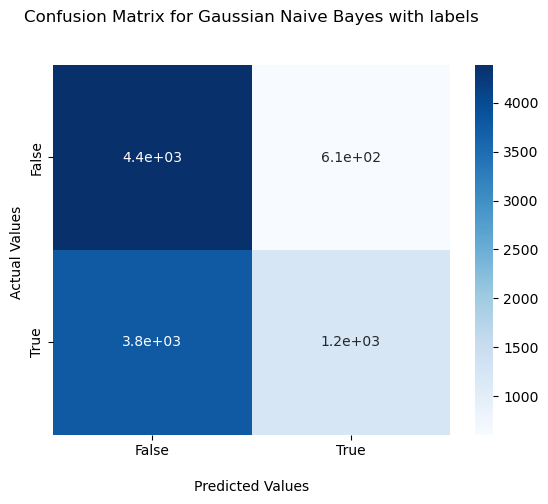

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for Gaussian Naive Bayes with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [31]:
mnb= MultinomialNB(alpha=1.0,fit_prior=True)
mnb.fit(trainx, trainy)

ypm= mnb.predict(testx)

print("Multinomial = ", accuracy_score(testy, ypm))

Multinomial =  0.6451


In [32]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(testy,ypm)

print(cm1)

[[4090  904]
 [2645 2361]]


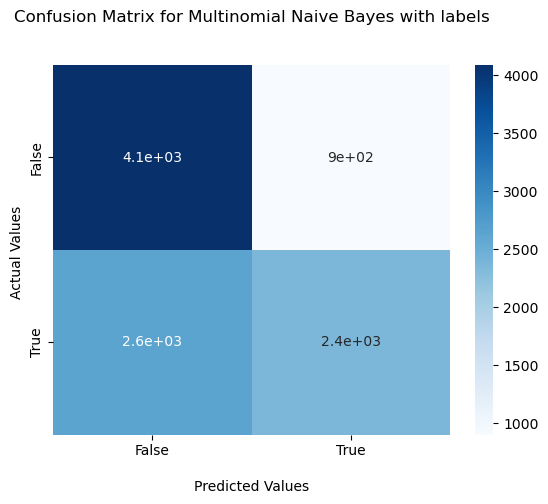

In [33]:

ax = sns.heatmap(cm1, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for Multinomial Naive Bayes with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [34]:
bnb= BernoulliNB(alpha=1.0,fit_prior=True)
bnb.fit(trainx, trainy)

BernoulliNB()

In [35]:
ypb= bnb.predict(testx)

print("Bernoulli = ", accuracy_score(testy, ypb))

Bernoulli =  0.6865


In [36]:
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(testy,ypb)

print(cm2)

[[3486 1508]
 [1627 3379]]


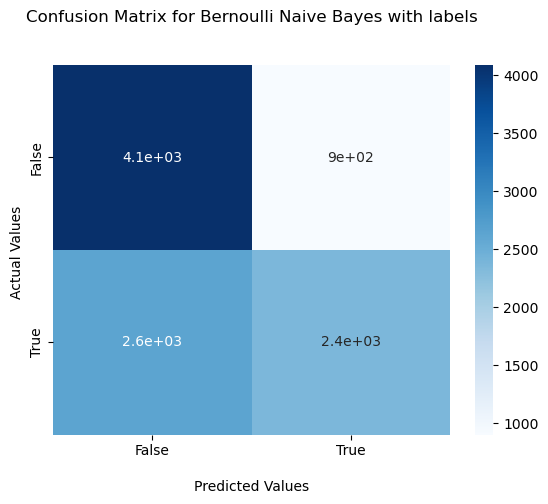

In [37]:
import seaborn as sns
ax = sns.heatmap(cm1, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for Bernoulli Naive Bayes with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=987)
cross_val_score(dtc, trainx, trainy, cv=10)

array([0.7115 , 0.70925, 0.7065 , 0.69975, 0.71525, 0.71375, 0.7185 ,
       0.709  , 0.71175, 0.72125])

In [39]:
dtc.fit(trainx,trainy)

DecisionTreeClassifier(random_state=987)

In [40]:
ypdt= bnb.predict(testx)

print("Decision Tree Classifier = ", accuracy_score(testy, ypdt))

Decision Tree Classifier =  0.6865


In [41]:
pickle.dump(bnb,open('model1.pkl','wb'))

In [42]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

# Example functions (assuming you've already defined these)
def clean(text):
    # Cleaning implementation
    return text

def is_special(text):
    # Special character handling implementation
    return text

def to_lower(text):
    # Lowercasing implementation
    return text

def rem_stopwords(text):
    # Stopwords removal implementation
    return text

def generate_bigrams(text):
    # Bigram generation implementation (dummy function)
    return text

# Input review
rev = input()

# Processing steps
f1 = clean(rev)
f2 = is_special(f1)
f3 = to_lower(f2)
f4 = rem_stopwords(f3)
f5 = generate_bigrams(f4)

# Initialize CountVectorizer
cv = CountVectorizer()

# Fit and transform the processed text into a bag of words (BoW) representation
X = cv.fit_transform([f5])

# Convert to an array if necessary
bow = X.toarray()

# Store the vocabulary
word_dict = cv.vocabulary_

# Save the vocabulary to a file
pickle.dump(word_dict, open('bow.pkl', 'wb'))


In [47]:
import numpy as np

# Create the input vector
inp = []
for i in word_dict:
    inp.append(f5.count(i))

# Ensure that inp is exactly 1200 elements long to match the model's expected input size
if len(inp) < 1200:
    inp.extend([0] * (1200 - len(inp)))  # Pad with zeros if too short
else:
    inp = inp[:1200]  # Truncate if too long

# Now reshape inp to match the expected shape (1, 1200)
y_pred = bnb.predict(np.array(inp).reshape(1, 1200))


In [48]:
print(y_pred)

[1]
